## Installation Commands (Required Libraries):

In [ ]:
pip install fireducks pandas matplotlib numpy duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


##Enable Benchmark Mode (FireDucks Special):

In [ ]:
FIREDUCKS_FLAGS = "--benchmark-mode"

##Code to Generate Large Dataset (10 Million Rows):

In [ ]:
import pandas as pd
import numpy as np

# Create 10 Million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 1000,  # up to 1000
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2021-01-01', periods=10_000_000, freq='s')
})

# Save to CSV
df.to_csv('large_dataset.csv', index=False)

print("Dataset with 10 Million Rows Generated Successfully!")


Dataset with 10 Million Rows Generated Successfully!


##Basic CSV Read & Filter:

In [ ]:
import os
import time

## for Pandas
import pandas as pd
start_time = time.time()
pdf = pd.read_csv('large_dataset.csv')
print(pdf.head())
print("Pandas Read Time:", time.time() - start_time)

## for FireDucks
import fireducks.pandas as fd
start_time = time.time()
fdf = fd.read_csv('large_dataset.csv')
print(fdf.head())
print("FireDucks Read Time:", time.time() - start_time)


   user_id      amount category            timestamp
0   684621  792.799848     food  2021-01-01 00:00:00
1   696679  751.784540     food  2021-01-01 00:00:01
2   344597  266.554975     tech  2021-01-01 00:00:02
3   331010  349.805167     food  2021-01-01 00:00:03
4   798942  270.092752     food  2021-01-01 00:00:04
Pandas Read Time: 11.741949319839478
   user_id      amount category            timestamp
0   684621  792.799848     food  2021-01-01 00:00:00
1   696679  751.784540     food  2021-01-01 00:00:01
2   344597  266.554975     tech  2021-01-01 00:00:02
3   331010  349.805167     food  2021-01-01 00:00:03
4   798942  270.092752     food  2021-01-01 00:00:04
FireDucks Read Time: 2.432565450668335


##GroupBy Category (Average amount):

In [ ]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print(pdf_grouped)
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print(fdf_grouped)
print("FireDucks GroupBy Time:", time.time() - start)

  category      amount
0  fashion  500.126624
1     food  499.567134
2     tech  499.824126
3   travel  499.873354
Pandas GroupBy Time: 0.8861682415008545
  category      amount
0  fashion  500.126624
1     food  499.567134
2     tech  499.824126
3   travel  499.873354
FireDucks GroupBy Time: 0.2503812313079834



##Filter + GroupBy (amount > 500 → Avg amount per category):

In [ ]:
## for Pandas
start = time.time()
pdf_result = pdf[pdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(pdf_result)
print("Pandas Filter + GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_result = fdf[fdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(fdf_result)
print("FireDucks Filter + GroupBy Time:", time.time() - start)


  category      amount
0  fashion  750.169299
1     food  750.010270
2     tech  749.733898
3   travel  749.924984
Pandas Filter + GroupBy Time: 1.0695066452026367
  category      amount
0  fashion  750.169299
1     food  750.010270
2     tech  749.733898
3   travel  749.924984
FireDucks Filter + GroupBy Time: 0.26174187660217285


##Sort by amount (Descending):

In [ ]:

## for Pandas
start = time.time()
pdf_sorted = pdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("Pandas Sort Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_sorted = fdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("FireDucks Sort Time:", time.time() - start)


Pandas Sort Time: 9.294556140899658
FireDucks Sort Time: 0.0005669593811035156


##Count Transactions per Category




In [ ]:
# Pandas
start_time = time.time()
pdf_grouped = pdf.groupby('category')['user_id'].count().reset_index()
print(pdf_grouped.head())
print("Pandas Count Time:", time.time() - start_time)

# FireDucks
start_time = time.time()
fdf_grouped = fdf.groupby('category')['user_id'].count().reset_index()
print(fdf_grouped.head())
print("FireDucks Count Time:", time.time() - start_time)

  category  user_id
0  fashion  2498072
1     food  2499548
2     tech  2501266
3   travel  2501114
Pandas Count Time: 0.9411382675170898
  category  user_id
0  fashion  2498072
1     food  2499548
2     tech  2501266
3   travel  2501114
FireDucks Count Time: 0.22287201881408691


##Total Amount per Category


In [ ]:
# Pandas
start_time = time.time()
pdf_total = pdf.groupby('category')['amount'].sum().reset_index()
print(pdf_total.head())
print("Pandas Total Amount Time:", time.time() - start_time)

# FireDucks
start_time = time.time()
fdf_total = fdf.groupby('category')['amount'].sum().reset_index()
print(fdf_total.head())
print("FireDucks Total Amount Time:", time.time() - start_time)

  category        amount
0  fashion  1.249352e+09
1     food  1.248692e+09
2     tech  1.250193e+09
3   travel  1.250240e+09
Pandas Total Amount Time: 1.0703396797180176
  category        amount
0  fashion  1.249352e+09
1     food  1.248692e+09
2     tech  1.250193e+09
3   travel  1.250240e+09
FireDucks Total Amount Time: 0.23946905136108398


##Performance Comparison: Pandas vs FireDucks (Bar Chart):

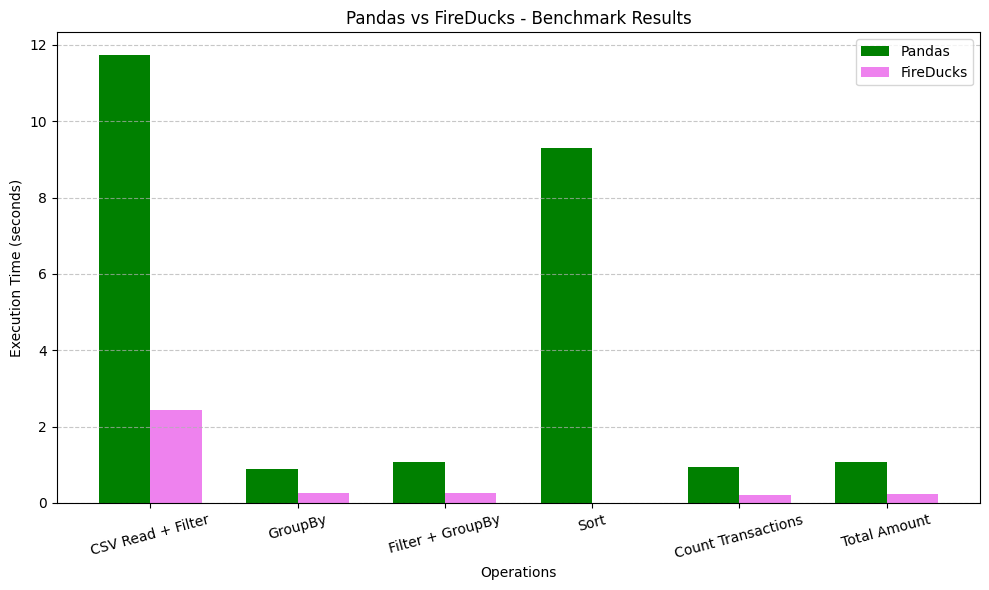

In [13]:
import matplotlib.pyplot as plt

# Operation Names
operations = ['CSV Read + Filter', 'GroupBy', 'Filter + GroupBy', 'Sort', 'Count Transactions', 'Total Amount']

# Execution Times (in seconds)
pandas_times = [11.74, 0.88, 1.06, 9.29, 0.94, 1.07]      # Pandas Times
fireducks_times = [2.43, 0.25, 0.26, 0.00, 0.22, 0.23]     # FireDucks Times

x = range(len(operations))

plt.figure(figsize=(10, 6))
plt.bar(x, pandas_times, width=0.35, label='Pandas', color='green')
plt.bar([i + 0.35 for i in x], fireducks_times, width=0.35, label='FireDucks', color='violet')

plt.xlabel('Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs FireDucks - Benchmark Results')
plt.xticks([i + 0.175 for i in x], operations, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()